In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [3]:
class EpochLoss:
  def __init__(self, epoch, loss, weight, intercept):
    self.epoch = epoch
    self.loss = loss
    self.weight = weight
    self.intercept = intercept
    


class SGDLogisticRegression:           


    def sigmoid(self, x, w, b):
        
        z = np.dot(x, w.T) + b
        sig = 1 / (1 + np.exp(-z))
        
        return sig
        
        
    
    def fit(self, X_train, X_test, y_train, y_test, eta0, alpha, num_iteration):
        
        N_train = len(X_train)
        N_test = len(X_test)
        lst_train = []
        lst_test = []
        
        #Initial w and b
        w = np.zeros_like(X[0])
        b = 0

        for epoch in range(1, num_iteration):
            
            #----------CALCULATING LOSS FOR TRAIN-------------#
            lst_y_pred_train = []
            lst_y_pred_test = []
            for i in range(N_train):
                
                #calculating sigmoid of z
                '''y_pred_train = self.sigmoid(X_train[i], w, b)                
                lst_y_pred_train.append(y_pred_train)
                
                calculating sigmoid of z
                y_pred_test = self.sigmoid(X_test[i], w, b)
                lst_y_pred_test.append(y_pred_test)'''
                
                
                y_pred_train = self.sigmoid(X_train[i], w, b)
                
                #subtracting y_pred_train from y_train to get error
                error = y_train[i] - y_pred_train

                #Updating weights and intercept
                w = (1 - (alpha * eta0)/N_train) * w + alpha * X_train[i] * error
                b = (b + alpha * error)

            #Calculating log loss for Train
            lst_y_pred_train =  np.array([self.sigmoid(X_train[i], w, b) for i in range(N_train)])
            avg_log_loss_train = log_loss(y_train, lst_y_pred_train)
            
            #Calculating log loss for Test
            lst_y_pred_test = np.array([self.sigmoid(X_test[i], w, b) for i in range(N_test)])
            avg_log_loss_test = log_loss(y_test, lst_y_pred_test)

            
            
            #Checking if previous epoch for train data is having the same value then breaking the epoch loop
            round_upto = 4
            if len(lst_train) > 0:

              found = False
              for loss in lst_train:
                if loss.loss == round(avg_log_loss_train, round_upto):
                  found = True
                  break
              
              if found == False:
                lst_train.append(EpochLoss(epoch, round(avg_log_loss_train, round_upto), w, b))
                lst_test.append(EpochLoss(epoch, round(avg_log_loss_test, round_upto), w, b))
              else:
                break

            else:
                lst_train.append(EpochLoss(epoch, round(avg_log_loss_train, round_upto), w, b))
                lst_test.append(EpochLoss(epoch, round(avg_log_loss_test, round_upto), w, b))
            
            

            print('Epoch=%d, Bias=%.3f, Avg. Loss=%.4f' % (epoch, b, avg_log_loss_train))
        
        self.coef = w 
        self.intercept = b
        self.lstEpochLoss_train = lst_train
        self.lstEpochLoss_test = lst_test

        return self

    def pred(self, w, b, X):
      
      N = len(X)
      predict = []
      for i in range(N):
        if self.sigmoid(w, X[i], b) >= 0.5:
          predict.append(1)
        else:
          predict.append(0)
          
      return np.array(predict)

In [4]:
eta0  = 0.0001 #lambda
alpha = 0.0001 #learning rate
num_iterations = 20

sgd_logistic_reg = SGDLogisticRegression()
model = sgd_logistic_reg.fit(X_train, X_test, y_train, y_test, eta0, alpha, num_iterations)

Epoch=1, Bias=-0.315, Avg. Loss=0.4040
Epoch=2, Bias=-0.472, Avg. Loss=0.3884
Epoch=3, Bias=-0.581, Avg. Loss=0.3831
Epoch=4, Bias=-0.660, Avg. Loss=0.3808
Epoch=5, Bias=-0.718, Avg. Loss=0.3796
Epoch=6, Bias=-0.762, Avg. Loss=0.3790
Epoch=7, Bias=-0.794, Avg. Loss=0.3786
Epoch=8, Bias=-0.819, Avg. Loss=0.3785
Epoch=9, Bias=-0.837, Avg. Loss=0.3784
Epoch=10, Bias=-0.851, Avg. Loss=0.3783



--- Weight ---
[-0.42483228  0.19148808 -0.1465521   0.33813581 -0.21434406  0.56645689
 -0.44530973 -0.09124939  0.21893754  0.17080465  0.19611785  0.00156244
 -0.0787098   0.33888235  0.0223552 ]

--- Intercept ---
-0.8608553931749093


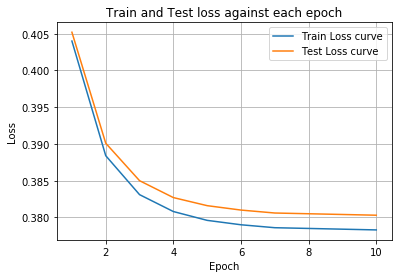

In [5]:
print('\n--- Weight ---')
print(model.coef)

print('\n--- Intercept ---')
print(model.intercept)

#Train Loss and epoch
loss_train = [o.loss for o in model.lstEpochLoss_train]
epoch_train = [o.epoch for o in model.lstEpochLoss_train]

#Test Loss and epoch
loss_test = [o.loss for o in model.lstEpochLoss_test]
epoch_test = [o.epoch for o in model.lstEpochLoss_test]


#Plotting curve
plt.plot(epoch_train, loss_train, label='Train Loss curve')
plt.plot(epoch_test, loss_test, label='Test Loss curve')

#Adding legends, label, title and grid to the plot
plt.legend()
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.title('Train and Test loss against each epoch')
plt.grid()

plt.show()

### Implementing SGDClassifier from sklearn

In [6]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

### Comparing weight vector and intercept of sklearn SGDClassifier and sgd_logistic_reg

In [7]:
model.coef - clf.coef_, model.intercept - clf.intercept_

(array([[-0.01305797,  0.00732026, -0.00760137,  0.0024107 , -0.03011169,
          0.01702169,  0.00682719, -0.00267474,  0.00357093, -0.00271292,
          0.01130958, -0.00287218, -0.0083798 ,  0.00205055,  0.00231391]]),
 array([-0.09903979]))

### Getting acurracy from custom classifier

In [8]:
print('\n--- Accuracy on X_train ---')
y_hat_train = sgd_logistic_reg.pred(model.coef, model.intercept, X_train)
print(1- np.sum(y_train - y_hat_train) / len(X_train))

print('\n--- Accuracy on X_test ---')
y_hat_test = sgd_logistic_reg.pred(model.coef, model.intercept, X_test)
print(1-np.sum(y_test  - y_hat_test)/len(X_test))


--- Accuracy on X_train ---
0.9547466666666666

--- Accuracy on X_test ---
0.95224
